# Trabajo práctico
Convinando las técnicas descriptas anteriormente, implemente una CNN para el problema [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html). Objetivos en el conjunto de validación:
* accuracy > 0.3.
* top-5 accuracy > 0.6.

**NOTA:** No es necesario que su solución utilice todas las técnicas descriptas.

### Opcional
Intente implementar otra solución utilizando módulos fire que se describen en la arquitectura [SqueezeNet](https://arxiv.org/abs/1602.07360).

## Requerimientos:


1.   El notebook debe correr linealmente.
2.   Debe entregarse con las salidas ejecutadas.
3.   Debe incluirse una pequeña explicación antes de cada arquitectura probada.
4.   Debe incluirse una conclusión al final del trabajo.



100 primeros elementos del conjunto de entrenaimento


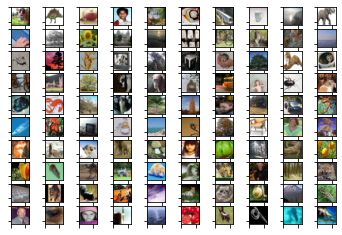

clases: 19, 29, 0, 11, 1, 86, 90, 28, 23, 31, 39, 96, 82, 17, 71, 39, 8, 97, 80, 71, 74, 59, 70, 87, 59, 84, 64, 52, 42, 64, 8, 17, 47, 65, 21, 22, 81, 11, 24, 84, 78, 45, 49, 97, 56, 76, 11, 90, 89, 78, 73, 14, 87, 9, 71, 6, 47, 20, 98, 47, 36, 55, 72, 43, 51, 35, 83, 33, 27, 53, 92, 50, 15, 89, 36, 18, 89, 46, 33, 42, 39, 64, 75, 38, 23, 42, 66, 77, 49, 18, 46, 15, 35, 69, 95, 83, 75, 99, 73, 93


In [ ]:
#Levanta el cifar-100
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

print('100 primeros elementos del conjunto de entrenaimento')
f = plt.figure(111)
for i in range(10):
    for j in range(10):
        ax = f.add_subplot(10, 10, i + j*10 + 1)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.imshow(x_train[i + j*10, ...])
plt.show()
print('clases: ' + ', '.join(map(str, y_train[:100, 0])))

## Pre procesamiento de los datos de entrada

Como primer paso, para una mejor eficiencia en el entrenamiento de la red neuronal, normalizamos nuestro dataset.

Para el caso de los datos a entrenar (x_train) y de los datos de testing (x_test) dividimos cada elemento por 255, de manera que nuestros nuevos datos estén en un rango de [0,1].

Por otro lado, para las clases a entrenar (y_train) y las clases de testing (y_test), convertimos cada una a datos categóricos (formato OneHot encoder).



In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalizamos los datos de entrenamiento y testing
x_train = x_train / 255
x_test = x_test / 255

# Imprimimos los nuevos datos
print(x_train)
print(x_test)

# Transformamos los datos de las clases a un formato OneHot encoder.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Imprimimos los nuevos datos

print(y_train)
print(y_test)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.76470588 0.80392157 0.75686275]
   [0.83137255 0.87843137 0.8       ]
   [0.71372549 0.76078431 0.65490196]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.66666667 0.69019608 0.58823529]
   [0.63137255 0.65882353 0.50980392]
   [0.57254902 0.60392157 0.44313725]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   ...
   [0.74117647 0.78039216 0.6627451 ]
   [0.65098039 0.69803922 0.50980392]
   [0.4745098  0.52156863 0.34117647]]

  ...

  [[0.58039216 0.7254902  0.30980392]
   [0.55686275 0.71372549 0.22352941]
   [0.54901961 0.70196078 0.23529412]
   ...
   [0.11764706 0.06666667 0.00392157]
   [0.25490196 0.24313725 0.05882353]
   [0.29803922 0.30196078 0.07843137]]

  [[0.47843137 0.61568627 0.25882353]
   [0.4

## Técnicas utilizadas para evitar *Overfitting*

Luego de aplicar el procesamiento y durante el entrenamiento utilizamos la técnica de **[Dropout](https://keras.io/api/layers/regularization_layers/dropout/)** simplemente para evitar *Overfitting*, dado el conjunto de datos de entrada.


El Dropout obliga a una red neuronal a aprender características más sólidas que son útiles en conjunto con muchos subconjuntos aleatorios diferentes de las otras neuronas.












# Estructura de la red neuronal


En este paso creamos la estructura de la CNN. Utilizamos capas convolucionales 2D con 3 canales (nuestras imágenes están en RGB), una función de activación *ReLu* y capas de 32 y 64 filtros.

Además, creamos una capa de ruido utilizando DropOut, para evitar que haya overfiting. 

Por otro lado, utilizamos *Pooling* para compensar la información, ya que reduce la salida de una red en una posición utilizando alguna función estádistica de la misma. En nuestro caso, utilizamos Max pooling que reemplaza una posición y sus vecinos por el máximo valor en el vecindario.

Una vez definida las capas convolucionales y el pooling, utilizamos Flatten que nos permite aplanar los datos para luego utilizarlos en una capa densa.

Finalmente, creamos una capa que está densamente conectada con las anteriores (es decir, que todas las neuronas de cada capa están conectadas con todas las neuronas de la capa siguiente) y le aplicamos la función *Softmax* que permite conectar la capa de salida final que tendrá la cantidad de neuronas correspondientes con las clases que estamos clasificando.




Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)       

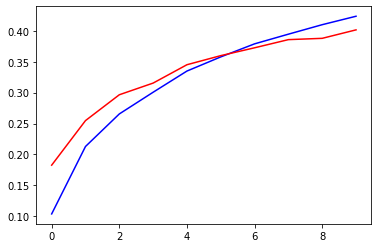

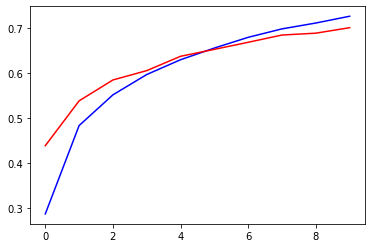

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model 
from tensorflow.keras.metrics import top_k_categorical_accuracy
i = Input(shape=(x_train.shape[1], x_train.shape[2], 3))
d = Conv2D(32, (3,3), activation = "relu")(i)
d = Conv2D(32, (3,3), activation = "relu")(d)
d = MaxPooling2D((2, 2))(d)
d = Dropout(0.25)(d)
d = Conv2D(64, (3,3), activation = "relu")(d)
d = Conv2D(64, (3,3), activation = "relu")(d)
d = MaxPooling2D((2, 2))(d)
d = Dropout(0.25)(d)
d = Flatten()(d)
d = Dense(100, activation="softmax")(d)

model = Model(inputs=i, outputs=d)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy', 'top_k_categorical_accuracy']) 
errors = []
h = model.fit(x_train, y_train, epochs = 10, batch_size=100, verbose=2,
              validation_data=(x_test, y_test))

plt.plot(h.history['accuracy'], 'b-') 
plt.plot(h.history['val_accuracy'], 'r-') 

plt.show()

plt.plot(h.history['top_k_categorical_accuracy'], 'b-')
plt.plot(h.history['val_top_k_categorical_accuracy'], 'r-')

plt.show()




# Conclusiones

Hemos visto como podemos aplicar los distintos algoritmos de Aprendizaje Profundo (más específicamente las Redes Neuronales Convolucionales - CNN) a un dataset de imágenes como es el CIFAR-100. 

Por otro lado, vimos que aplicando una arquitectura CNN simple multicapa con 32 y 64 filtros, un procesamiento en los datos de entrada y sucesivas capas de pooling logramos un accuracy razonable (> 0.3)


